In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import math as mt
import matplotlib.pyplot as plt

2.6.0


In [2]:
StartingValues=np.load('DiscretizedCurve10TrainingsetMultivariate.npy')
print(StartingValues.shape)

(10000000, 10)


Now calculate the outputs...

In [3]:
Y=np.load('outputsMultiVariate.npy')
print(Y.shape)

(10000000,)


In [4]:
import os
os.getcwd()

'/home/jovyan/work/notebooks'

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Lambda
from tensorflow.keras.losses import MeanSquaredError
#from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import initializers
from tensorflow.keras.layers import Input, Add
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K


inputs =  tf.keras.Input(shape=(10,))

#nodeHiddenLayer=250

models = []
for nodeHiddenLayer in range(5,155,5):
    layer = Dense(nodeHiddenLayer, activation='relu',trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal')

    outlayer=Dense(1, activation=None,trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      use_bias=False)
    
    tmp=layer(inputs)
    finalOutput=outlayer(tmp)
                              
    model = Model(inputs=inputs, outputs=finalOutput)

    model.compile(optimizer='adam',loss='mean_squared_error')
    models=models+[model]

models[0].summary()
models[29].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_58 (Dense)             (None, 150)               1650      
_______________________________________________

In [6]:
import time
for k in range(0,len(models),1):
    tic = time.perf_counter()
    models[k].fit(StartingValues, Y, epochs=50, batch_size=10000)
    toc = time.perf_counter()
    print(k)
    print(f"Calc time: {(toc - tic)/60.0:0.4f} minutes")

2022-02-10 22:04:28.139037: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1000/1000 [==============================] - 6s 5ms/step - loss: 1.6309
Epoch 2/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1003
Epoch 3/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0852
Epoch 4/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0737
Epoch 5/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0692
Epoch 6/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0684
Epoch 7/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0682
Epoch 8/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0680
Epoch 9/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0678
Epoch 10/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0676
Epoch 11/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0674
Epoch 12/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0673
E

1000/1000 [==============================] - 6s 6ms/step - loss: 0.0655
Epoch 46/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0655
Epoch 47/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0655
Epoch 48/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0655
Epoch 49/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0655
Epoch 50/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0655
3
Calc time: 4.9436 minutes
Epoch 1/50
1000/1000 [==============================] - 8s 7ms/step - loss: 0.0754
Epoch 2/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0670
Epoch 3/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0667
Epoch 4/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0663
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0660
Epoch 6/50
1000/1000 [==============================] - 7s 7ms/st

1000/1000 [==============================] - 8s 8ms/step - loss: 0.0674
Epoch 40/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0674
Epoch 41/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0675
Epoch 42/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0674
Epoch 43/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0674
Epoch 44/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0674
Epoch 45/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0674
Epoch 46/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0674
Epoch 47/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0674
Epoch 48/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0674
Epoch 49/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0674
Epoch 50/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0674
7
Ca

1000/1000 [==============================] - 9s 9ms/step - loss: 0.0658
Epoch 34/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0658
Epoch 35/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0657
Epoch 36/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0657
Epoch 37/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0657
Epoch 38/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0657
Epoch 39/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0657
Epoch 40/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0658
Epoch 41/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0657
Epoch 42/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0657
Epoch 43/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0657
Epoch 44/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0657
Ep

Epoch 23/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 24/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 25/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 26/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 27/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 28/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 29/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0678
Epoch 30/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 31/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 32/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 33/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0677
Epoch 34/50
1000/1000 [==============================]

Epoch 12/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0661
Epoch 13/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0659
Epoch 14/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0660
Epoch 15/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0660
Epoch 16/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0659
Epoch 17/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0659
Epoch 18/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0660
Epoch 19/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0659
Epoch 20/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0659
Epoch 21/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0660
Epoch 22/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0660
Epoch 23/50
1000/1000 [==============================]

Epoch 1/50
1000/1000 [==============================] - 14s 13ms/step - loss: 1.1798
Epoch 2/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1773
Epoch 3/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1103
Epoch 4/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0757
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0679
Epoch 6/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0674
Epoch 7/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0676
Epoch 8/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0678
Epoch 9/50
1000/1000 [==============================] - 13s 12ms/step - loss: 0.0679
Epoch 10/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0679
Epoch 11/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0679
Epoch 12/50
1000/1000 [==============================] - 13s 13

1000/1000 [==============================] - 13s 13ms/step - loss: 0.0658
Epoch 47/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0660
Epoch 48/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0659
Epoch 49/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0659
Epoch 50/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0660
24
Calc time: 11.2814 minutes
Epoch 1/50
1000/1000 [==============================] - 14s 13ms/step - loss: 4.9062
Epoch 2/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1082
Epoch 3/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0906
Epoch 4/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0778
Epoch 5/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0701
Epoch 6/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0676
Epoch 7/50
1000/1000 [====================

1000/1000 [==============================] - 14s 14ms/step - loss: 0.0663
Epoch 35/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0666
Epoch 36/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0665
Epoch 37/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0664
Epoch 38/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0666
Epoch 39/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0664
Epoch 40/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0665
Epoch 41/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0664
Epoch 42/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0664
Epoch 43/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0664
Epoch 44/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0665
Epoch 45/50
1000/1000 [==============================] - 13s 13ms/

In [7]:
MCpricesTestset=np.load('outputsMultiVariateTestset100000Simulations.npy')
xvaluesTestset=np.load('DiscretizedCurve10TestsetMultivariate.npy')

[1.90911372e-03 1.91138883e-03 1.13648850e-04 1.42079996e-04
 9.19642916e-05 1.90126500e-03 3.10767646e-04 1.89647696e-03
 2.05941661e-03 1.11019726e-04 2.07768535e-04 7.01973506e-04
 2.19291728e-03 1.69662002e-03 1.12865528e-04 2.58091884e-03
 1.08417982e-04 1.21584184e-04 1.45985963e-04 1.34709093e-03
 7.13927788e-04 3.22925253e-03 2.75695557e-03 1.90501765e-03
 1.69258026e-04 5.94416575e-04 1.95561466e-03 1.21271843e-03
 1.54934620e-04 6.22662017e-04]


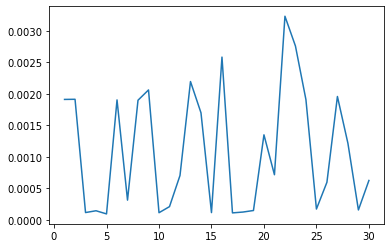

In [8]:
mctf=tf.reshape(tf.constant(MCpricesTestset),[MCpricesTestset.shape[0],1])
mctf=tf.dtypes.cast(mctf, tf.float32)
mse = tf.keras.losses.MeanSquaredError()
mses=np.zeros(30)
for k in range(0,30,1):
    predictions=models[k](xvaluesTestset)
    mses[k]=mse(predictions, mctf).numpy()
print(mses)
xvalues=range(1,31,1)
plt.plot(xvalues,mses)
plt.show()

In [9]:
np.save('msePointBasedMultivariate10discretized',mses)

In [10]:
predictionTest=model(xvaluesTestset)
mctf=tf.reshape(tf.constant(MCpricesTestset),[MCpricesTestset.shape[0],1])
mctf=tf.dtypes.cast(mctf, tf.float32)
mse = tf.keras.losses.MeanSquaredError()
mse(predictionTest, mctf).numpy()

0.000622662